<a href="https://colab.research.google.com/github/mjvakili/MLcourse/blob/master/day3/Convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Let's start by loading the modules
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import tensorflow as tf

Using TensorFlow backend.


Now we load the MNIST data (LeCun et al 1998). These are grey scale images of handwritten digits. For many years, this dataset has been used in testing computer vision and machine learning algorithms.

---



In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print("shape of the training sample=", x_train.shape)

shape of the training sample= (60000, 28, 28)


In [0]:
filters = {'horizontal_edge': np.array([ [-1, 0, -1], [1, 0, -1], [1, 0, -1]]), 
           'vertical_edge': np.array([[1,1,1], [0,0,0],[-1,-1,-1]]), 
           'sobel': np.array([[1,0,-1], [2,0,-2],[1,0,-1]])}

In [0]:
def conv(input, filter_name):
  input = input/np.max(input)
  filter = filters[filter_name]
  Nx = input.shape[0]
  Ny = input.shape[1]
  output = np.zeros((Nx-1, Ny-1))
  for i in range(1, Nx-1):
    for j in range(1,Ny-1):
      block = 0.0
      block = block + (input[i - 1, j-1] * filter[0][0])
      block = block + (input[i, j-1] * filter[0][1])
      block = block + (input[i + 1, j-1] * filter[0][2])
      block = block + (input[i-1, j] * filter[1][0])
      block = block + (input[i, j] * filter[1][1])
      block = block + (input[i+1, j] * filter[1][2])
      block = block + (input[i-1, j+1] * filter[2][0])
      block = block + (input[i, j+1] * filter[2][1])
      block = block + (input[i+1, j+1] * filter[2][2])
      block = block 
      if block < 0 :
        block == 0 
      output[i, j] = block       
  
  return output

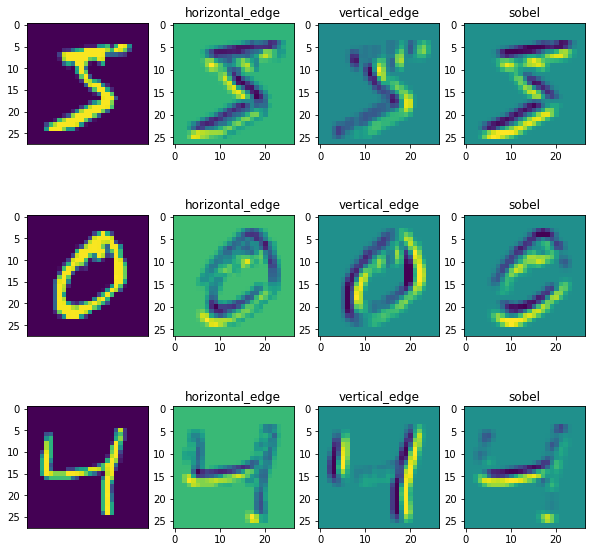

In [6]:
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (10,10))

for i in range(3):
  input = x_train[i]
  ax[i, 0].imshow(input)
  ax[i,0].set_xticks([])
  k = 1
  for (key, values) in filters.items():
    output = conv(input, key)
    ax[i, k].imshow(output)
    ax[i,k].set_title(key)
    k +=1

Let's look at another dataset

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Note the shape of the array:

$(N_x, N_y, N_f) = (28, 28, 3)$; 

where $N_x$ is the number of pixels along the horizontal axis, $N_y$ is the number of pixels along the vertical axis, and $N_f$ is the number of filters: $GRB$.

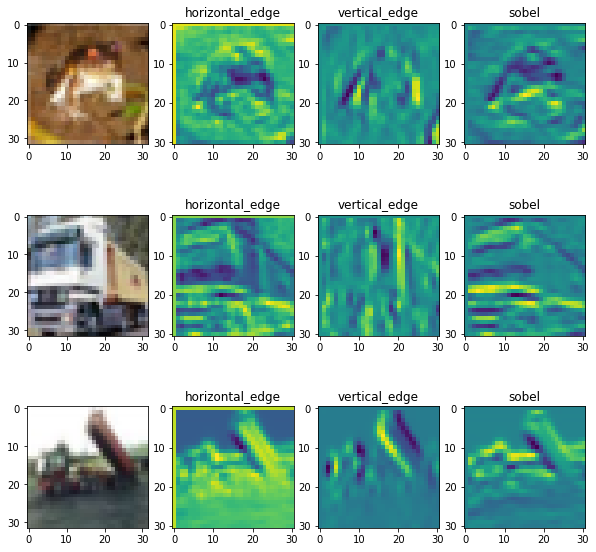

In [8]:
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (10,10))

for i in range(3):
  input = x_train[i]
  ax[i, 0].imshow(input)
  k = 1
  for (key, values) in filters.items():
    output = conv(input[:,:,0], key)+conv(input[:,:,1], key)+conv(input[:,:,2], key)   
    ax[i, k].imshow(output)
    ax[i,k].set_title(key)
    k +=1